 #                           Bike Sharing Model 


<img src="https://storage.googleapis.com/kaggle-datasets-images/1477511/2441592/904f489c3382086bb4b8ec7f10a14e12/dataset-cover.jpg?t=2021-07-19-14-40-14">

### Data Schema 

datetime: Record date and time (hourly interval)                                                                               
season: Season (1-4, spring-winter)                                                                                             
holiday: Whether it is a holiday or not (0 for no, 1 for yes)                                                                   
workingday: Whether it is a working day or not (0 for no, 1 for yes). If it is not a weekend or holiday, it is assumed to be a working day.                                                                                                                   
weather: Weather conditions (1 for clear, 2 for slightly cloudy, 3 for cloudy with light rain/snow, 4 for heavy rain/snow. The higher the number, the worse the weather).                                                                                     
temp: Actual temperature                                                                                                       
atemp: "Feels like" temperature                                                                                                 
windspeed: Wind speed                                                                                                           
casual: Number of non-registered users                                                                                         
registered: Number of registered users                                                                                         
count: Total number of bike rentals

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
# Import Training & Testing  Data 
data_Tr=pd.read_csv(r'D:\ITI Data Analysis\ML\Projects\Bike Share\train.csv')
data_Ts=pd.read_csv(r'D:\ITI Data Analysis\ML\Projects\Bike Share\test.csv')

In [3]:
dfr=data_Tr.copy()
dfs=data_Ts.copy()

In [4]:
dfr.shape

(10886, 12)

In [5]:
dfs.shape

(6493, 9)

### Mmmmmm, It Appears that the Two Datasets Have a Different Number of columns.
Let's explore more.

In [6]:
dfr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
dfs.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### We Need To drop 2 Columns ( casual, registered)

In [8]:
drop_features = ['casual', 'registered']
dfr = dfr.drop(drop_features,axis=1)
dfr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


### Let's work with the datetime column.

In [9]:
# Traning Data 
dfr['date'] = dfr['datetime'].apply(lambda x: x.split()[0])
dfr['year'] = dfr['datetime'].apply(lambda x: x.split()[0].split('-')[0])
dfr['month'] = dfr['datetime'].apply(lambda x: x.split()[0].split('-')[1])
dfr['day'] = dfr['datetime'].apply(lambda x: x.split()[0].split('-')[2])
dfr['hour'] = dfr['datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [10]:
# Testing Data 
dfs['date'] = dfs['datetime'].apply(lambda x: x.split()[0])
dfs['year'] = dfs['datetime'].apply(lambda x: x.split()[0].split('-')[0])
dfs['month'] = dfs['datetime'].apply(lambda x: x.split()[0].split('-')[1])
dfs['day'] = dfr['datetime'].apply(lambda x: x.split()[0].split('-')[2])
dfs['hour'] = dfs['datetime'].apply(lambda x: x.split()[1].split(':')[0])

### Split the training data into two parts: train and validation.

In [11]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(dfr,test_size = 0.2 , random_state = 0)



In [12]:
train.shape

(8708, 15)

In [13]:
val.shape

(2178, 15)

In [14]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.496899,0.029513,0.679835,1.413413,20.151585,23.566106,61.778824,12.848368,190.855535
std,1.118607,0.169249,0.466567,0.628714,7.772519,8.461146,19.201010,8.242156,180.852259
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.750000,7.001500,43.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,977.000000


## Note On Describe Table ! 
When observing the data, we found that based on the mean value, median value,                                                   
Q1 with the Min value, and Q3 with the Max value,                                                                               
we found that most of the features have a normal distribution except for the 'Count' column. We noticed that it is skewed to the right.

#### Let's explore more the distribution of the target column to ensure how skewed it is.

In [15]:
# Rename The Target (Y) Column 
train = train.rename(columns={'count': 'Target'})
val = val.rename(columns={'count': 'Target'})

<Figure size 1000x600 with 0 Axes>

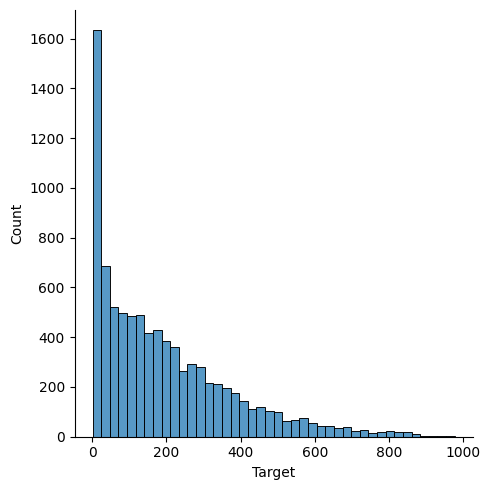

In [16]:
fig=plt.figure(figsize=(10,6))
sns.displot(train['Target']);

### To address the right-skewness, let's perform a log transformation.

<Axes: xlabel='Target', ylabel='Count'>

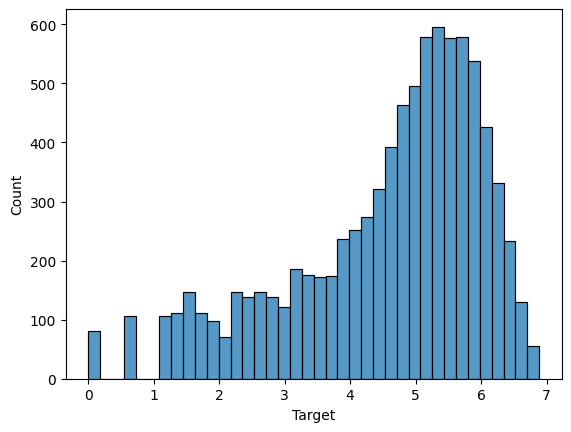

In [17]:
sns.histplot(np.log(train['Target']))

In [18]:
# Drop Unnecessary Columns
train = train.drop(['datetime', 'date'],axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,year,month,day,hour
3662,3,0,0,1,28.70,32.575,61,15.0013,257,2011,09,03,12
8648,3,0,1,1,33.62,38.635,52,16.9979,865,2012,08,02,17
7053,2,0,1,1,12.30,14.395,65,16.9979,96,2012,04,12,06
2685,2,0,0,1,29.52,34.090,62,8.9981,311,2011,06,19,19
5927,1,0,1,1,10.66,12.880,60,15.0013,2,2012,02,03,04


In [19]:
val = val.drop(['datetime', 'date'],axis=1)
val.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,year,month,day,hour
6638,1,0,1,1,23.78,27.275,56,7.0015,244,2012,03,13,21
7975,2,0,1,2,27.06,29.545,89,19.0012,239,2012,06,12,16
5915,1,0,1,1,18.86,22.725,55,19.0012,229,2012,02,02,16
8050,2,0,1,1,28.70,31.820,42,11.0014,467,2012,06,15,19
5894,1,0,1,1,22.14,25.760,52,19.0012,335,2012,02,01,19


In [93]:
dfs = dfs.drop(['datetime', 'date'],axis=1)
dfs.head()

,weather,temp,humidity,windspeed,MON_01,MON_02,MON_03,MON_04,MON_05,MON_06,...,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19
0,1,10.66,56,26.0027,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10.66,56,0.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,10.66,56,0.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,10.66,56,11.0014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10.66,56,11.0014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lets Create a Baseline Model 

In [20]:
#Base line Model Using Only Numerical Variable 
x= train.drop(["Target"],axis =1) # independent Valiables 
y = train[["Target"]] # output

from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(x,y,test_size = 0.3 , random_state = 0)
from sklearn.linear_model  import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X,train_y)*100

37.86526545016643

In [21]:
# R2 for measure the model performance on Test Data Set  
mlrm.score(val_X,val_y)*100

40.63288263725576

### Study the correlation between variables.

<Axes: >

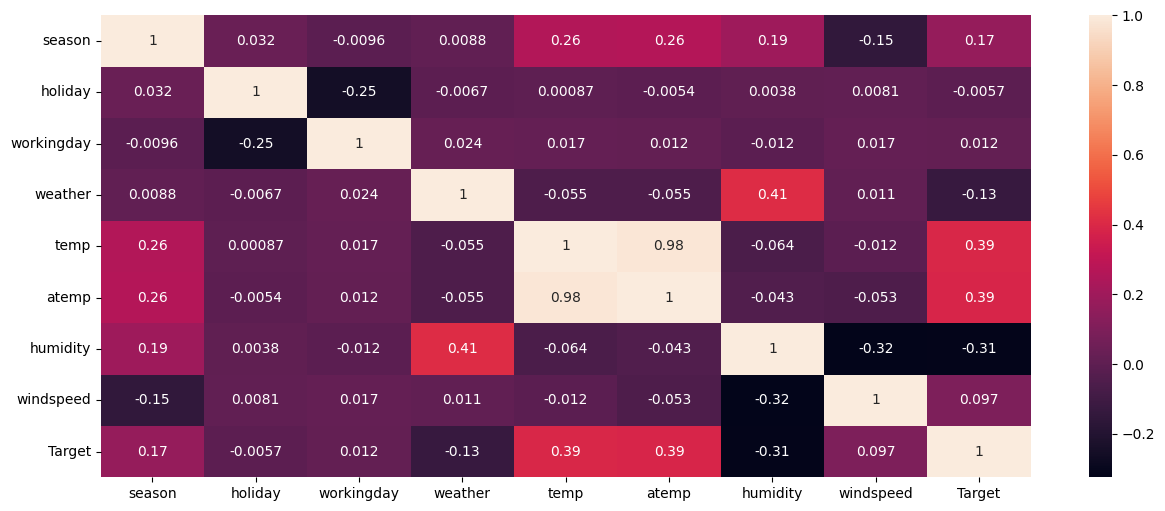

In [22]:
fig=plt.figure(figsize=(15,6))
sns.heatmap(train.corr(),annot=True)

###  Heatmap Note !
Upon observing a heatmap, we found that both temp and atemp are highly correlated with each other and with the target variable. Therefore, it is preferable to remove one of them.

In [23]:
# Drop "temp" from train, val, test Datasets
train = train.drop('atemp', axis=1)
val = val.drop('atemp', axis=1)
dfs= dfs.drop('atemp', axis=1)

In [24]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Target,year,month,day,hour
3662,3,0,0,1,28.70,61,15.0013,257,2011,09,03,12
8648,3,0,1,1,33.62,52,16.9979,865,2012,08,02,17
7053,2,0,1,1,12.30,65,16.9979,96,2012,04,12,06
2685,2,0,0,1,29.52,62,8.9981,311,2011,06,19,19
5927,1,0,1,1,10.66,60,15.0013,2,2012,02,03,04


### Cheack Each Feature Sepratly 

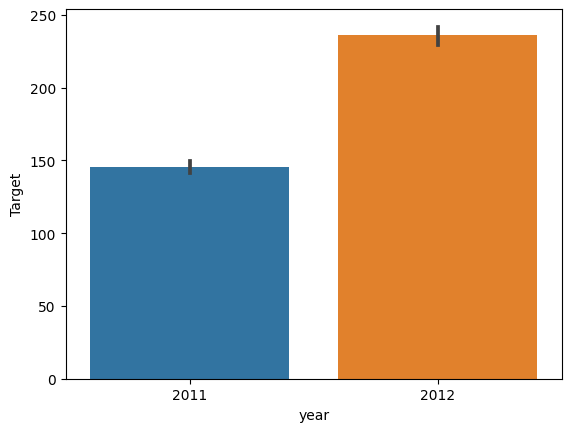

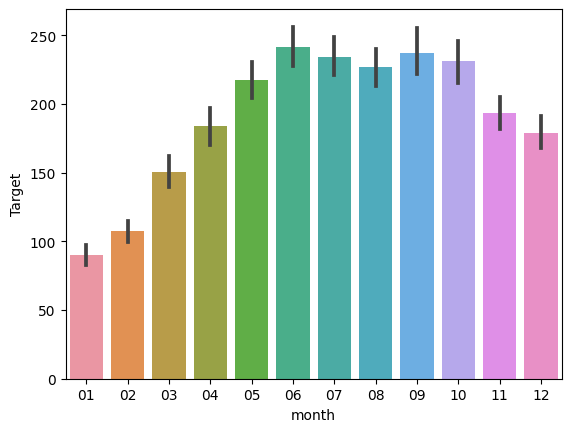

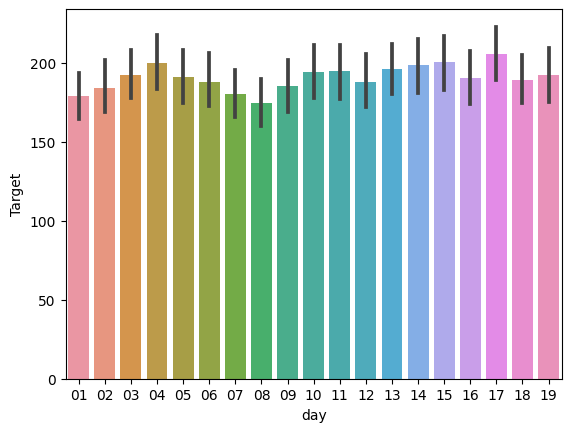

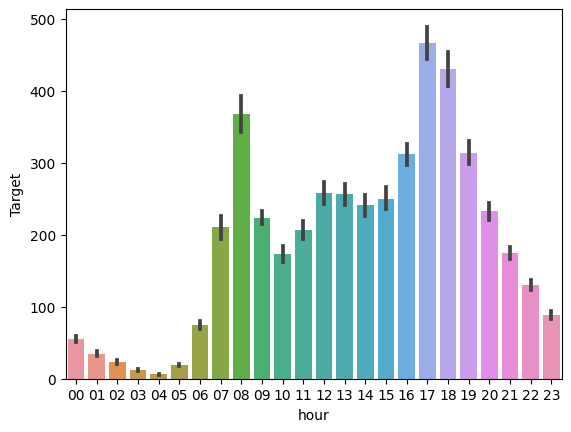

In [25]:
features = ['year', 'month', 'day', 'hour']
target = 'Target'

# Loop over the features and create a bar plot for each feature
for feature in features:
    # Sort the unique values of the feature in ascending order
    order = train[feature].sort_values().unique()
    # Create the bar plot
    sns.barplot(x=feature, y=target, data=train, order=order)
    plt.show()

In [31]:
train['hour']= np.where(train['hour']=='03','02',train['hour'])
val['hour']= np.where(val['hour']=='03','02',val['hour'])
dfs['hour']= np.where(dfs['hour']=='03','02',dfs['hour'])

train['hour']= np.where(train['hour']=='04','05',train['hour'])
val['hour']= np.where(val['hour']=='04','05',val['hour'])
dfs['hour']= np.where(dfs['hour']=='04','05',dfs['hour'])

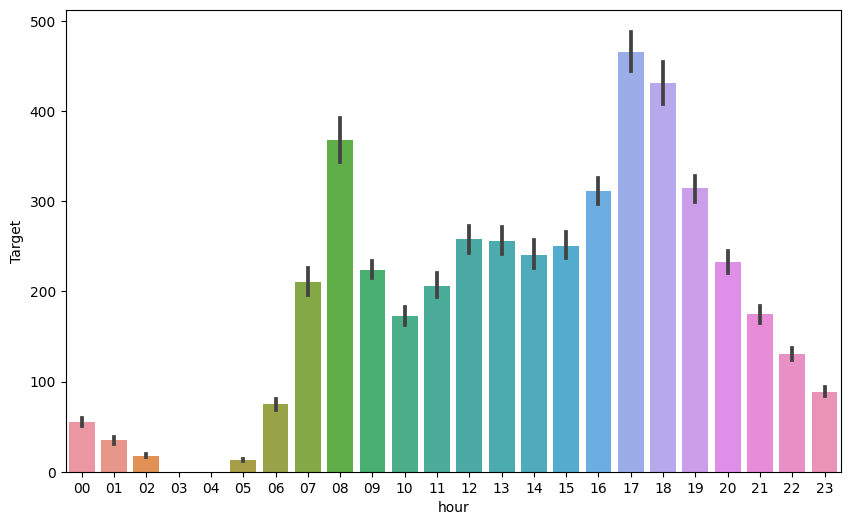

In [32]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='hour', y=target, data=train, order=order)
plt.show()

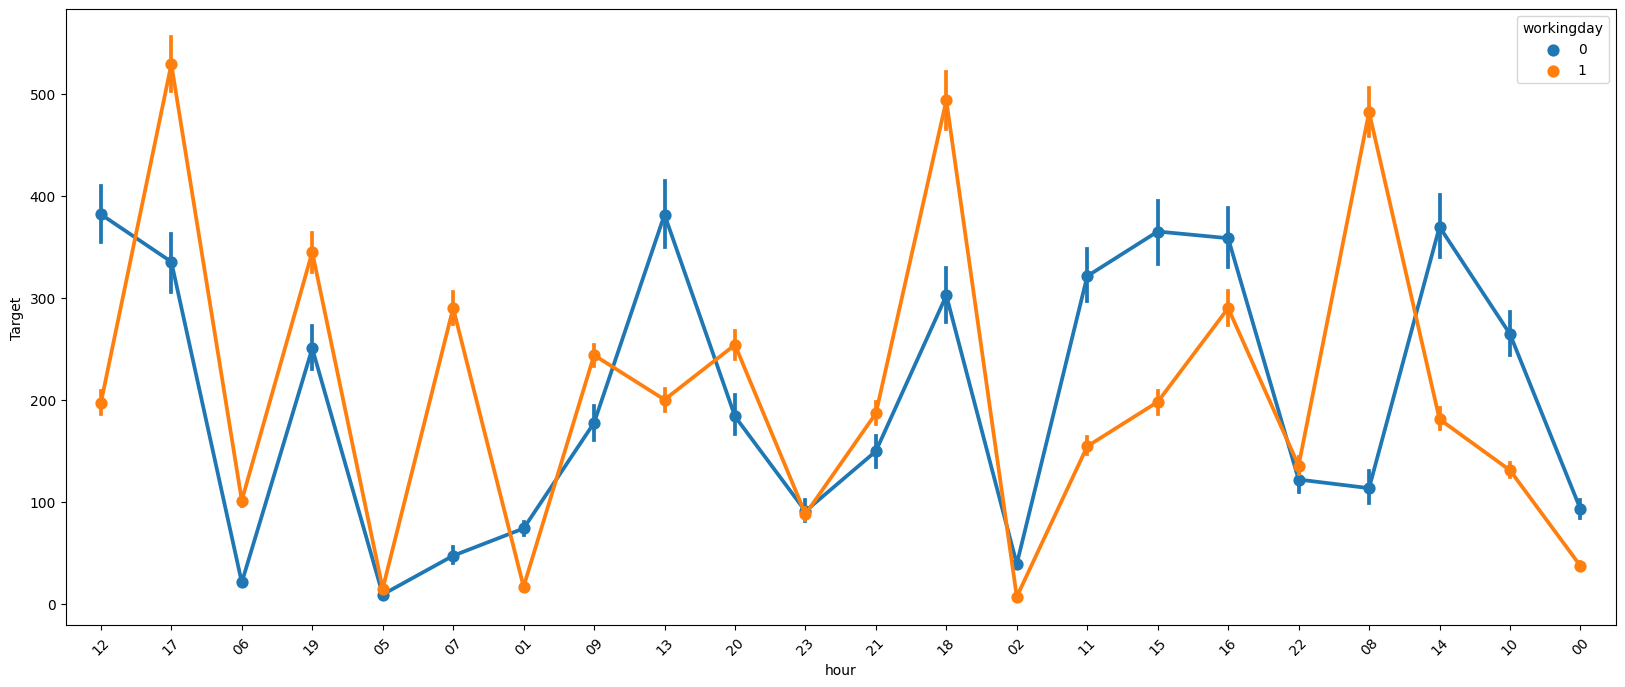

In [72]:
plt.figure(figsize = (20,8))
sns.pointplot(x = 'hour', y = 'Target', data = train, hue = 'workingday')
plt.xticks(rotation=45)
plt.show()

In [33]:
#season
train.season.value_counts()

2    2197
1    2181
4    2178
3    2152
Name: season, dtype: int64

<Axes: xlabel='season', ylabel='Target'>

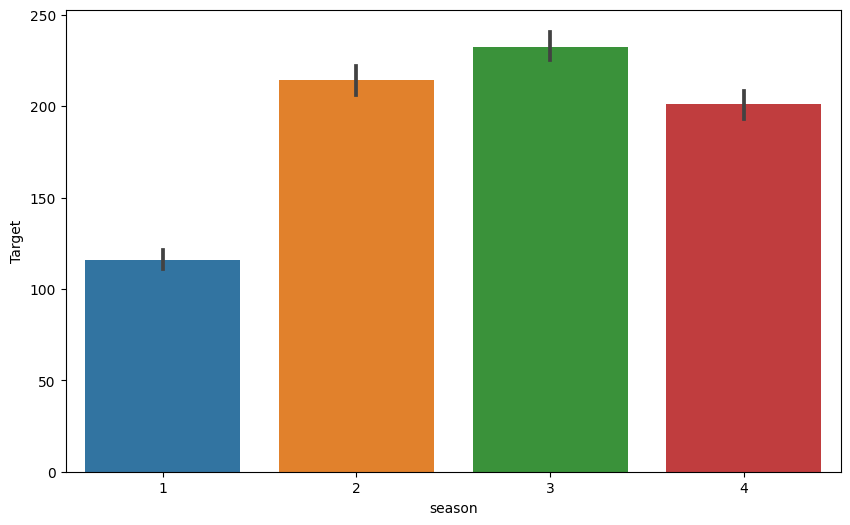

In [34]:
fig=plt.figure(figsize=(10,6))
sns.barplot(data=train,x='season',y='Target')


In [35]:
# holiday
train.holiday.value_counts()

0    8451
1     257
Name: holiday, dtype: int64

In [36]:
# workingday
train.workingday.value_counts()

1    5920
0    2788
Name: workingday, dtype: int64

In [37]:
# weather
train.weather.value_counts()

1    5772
2    2273
3     662
4       1
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='Target'>

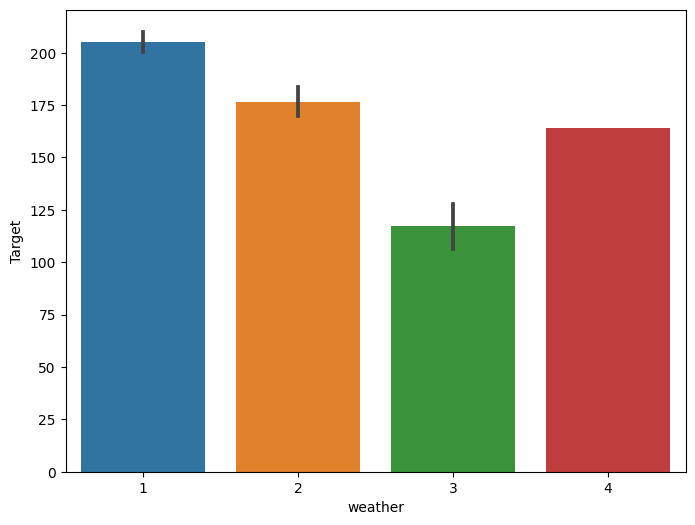

In [39]:
fig=plt.figure(figsize=(8,6))
sns.barplot(data=train,x='weather',y='Target')


In [40]:
# Clipping 
train['weather']= np.where(train['weather']>3,3,train['weather'])
val['weather']= np.where(val['weather']>3,3,val['weather'])
dfs['weather']= np.where(dfs['weather']>3,3,dfs['weather'])

In [41]:
# weather
train.weather.value_counts()

1    5772
2    2273
3     663
Name: weather, dtype: int64

In [55]:
# humidity
train['humidity'].value_counts().sort_index()

0       13
10       1
12       1
13       1
14       2
      ... 
93     158
94     260
96       1
97       1
100    111
Name: humidity, Length: 88, dtype: int64

In [53]:
hum=train.groupby("humidity").Target.agg([len,min,max])
hum

,len,min,max
humidity,,,
0,13,1,82
10,1,107,107
12,1,29,29
13,1,17,17
14,2,7,31
...,...,...,...
93,158,1,731
94,260,1,687
96,1,71,71


In [54]:
hum[hum['len']<6]

,len,min,max
humidity,,,
10,1,107,107
12,1,29,29
13,1,17,17
14,2,7,31
15,4,3,196
17,5,6,757
85,3,5,49
90,3,33,283
91,1,119,119


In [58]:
# Clipping Humidity 
train['humidity']= np.where(train['humidity']==10,15,train['humidity'])
train['humidity']= np.where(train['humidity']==12,15,train['humidity'])
train['humidity']= np.where(train['humidity']==13,15,train['humidity'])
train['humidity']= np.where(train['humidity']==14,15,train['humidity'])


In [59]:

val['humidity']= np.where(val['humidity']==10,15,val['humidity'])
val['humidity']= np.where(val['humidity']==12,15,val['humidity'])
val['humidity']= np.where(val['humidity']==13,15,val['humidity'])
val['humidity']= np.where(val['humidity']==14,15,val['humidity'])

In [60]:

dfs['humidity']= np.where(dfs['humidity']==10,15,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==12,15,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==13,15,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==14,15,dfs['humidity'])

In [61]:
hum=train.groupby("humidity").Target.agg([len,min,max])
hum

,len,min,max
humidity,,,
0,13,1,82
15,9,3,196
16,8,55,413
17,5,6,757
18,6,112,517
...,...,...,...
93,158,1,731
94,260,1,687
96,1,71,71


In [62]:
hum[hum['len']<6]

,len,min,max
humidity,,,
17,5,6,757
85,3,5,49
90,3,33,283
91,1,119,119
92,2,62,90
96,1,71,71
97,1,64,64


In [63]:
train['humidity']= np.where(train['humidity']==85,100,train['humidity'])
train['humidity']= np.where(train['humidity']==90,100,train['humidity'])
train['humidity']= np.where(train['humidity']==91,100,train['humidity'])
train['humidity']= np.where(train['humidity']==92,100,train['humidity'])
train['humidity']= np.where(train['humidity']==96,100,train['humidity'])
train['humidity']= np.where(train['humidity']==97,100,train['humidity'])

In [64]:
val['humidity']= np.where(val['humidity']==85,100,val['humidity'])
val['humidity']= np.where(val['humidity']==90,100,val['humidity'])
val['humidity']= np.where(val['humidity']==91,100,val['humidity'])
val['humidity']= np.where(val['humidity']==92,100,val['humidity'])
val['humidity']= np.where(val['humidity']==96,100,val['humidity'])
val['humidity']= np.where(val['humidity']==97,100,val['humidity'])

In [65]:
dfs['humidity']= np.where(dfs['humidity']==85,100,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==90,100,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==91,100,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==92,100,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==96,100,dfs['humidity'])
dfs['humidity']= np.where(dfs['humidity']==97,100,dfs['humidity'])

In [66]:
hum=train.groupby("humidity").Target.agg([len,min,max])
hum

,len,min,max
humidity,,,
0,13,1,82
15,9,3,196
16,8,55,413
17,5,6,757
18,6,112,517
...,...,...,...
88,284,1,809
89,114,1,738
93,158,1,731


<Axes: xlabel='humidity', ylabel='Target'>

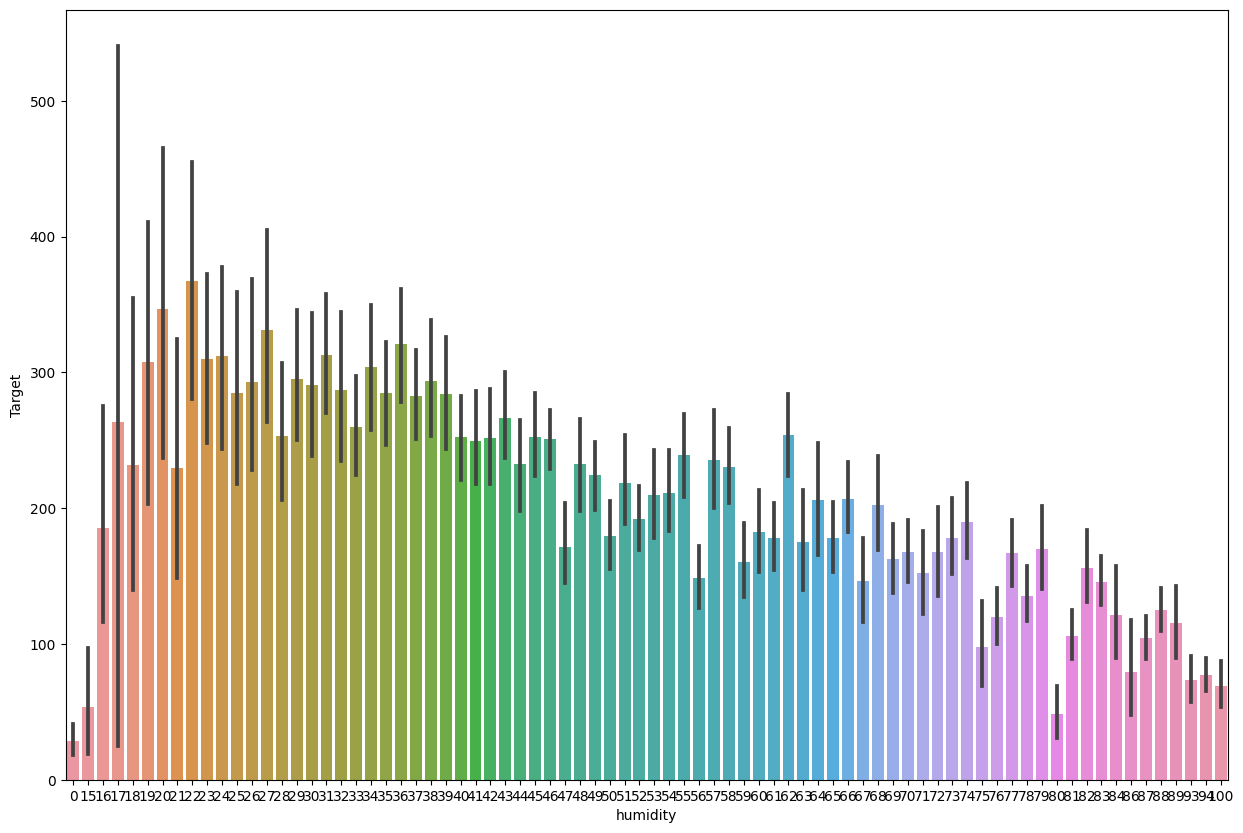

In [70]:
fig=plt.figure(figsize=(15,10))
sns.barplot(data=train,x='humidity',y='Target')


<Axes: >

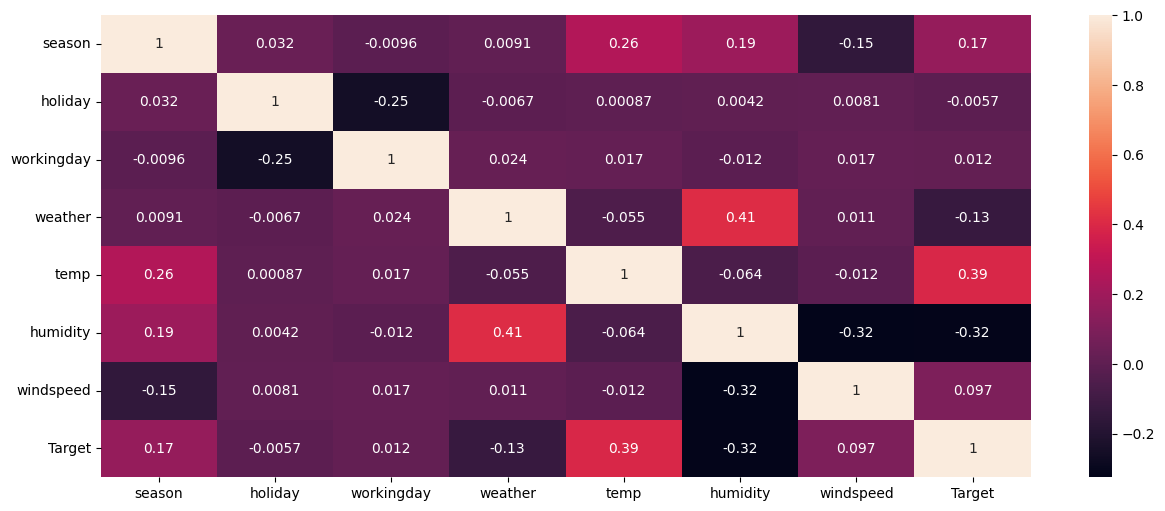

In [75]:
fig=plt.figure(figsize=(15,6))
sns.heatmap(train.corr(),annot=True)

### Label Transformation  

In [76]:
train['Target'] = train['Target'].apply(lambda x: np.log(x))
val['Target'] = val['Target'].apply(lambda x: np.log(x))

In [77]:
train

,season,holiday,workingday,weather,temp,humidity,windspeed,Target,year,month,day,hour
3662,3,0,0,1,28.70,61,15.0013,5.549076,2011,09,03,12
8648,3,0,1,1,33.62,52,16.9979,6.762730,2012,08,02,17
7053,2,0,1,1,12.30,65,16.9979,4.564348,2012,04,12,06
2685,2,0,0,1,29.52,62,8.9981,5.739793,2011,06,19,19
5927,1,0,1,1,10.66,60,15.0013,0.693147,2012,02,03,05
...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4,0,1,3,22.14,60,15.0013,5.030438,2011,11,15,13
3264,3,0,1,1,28.70,65,15.0013,5.236442,2011,08,05,22
9845,4,0,0,1,27.06,39,27.9993,6.424869,2012,10,14,14
10799,4,0,0,2,14.76,87,8.9981,4.882802,2012,12,16,09


In [78]:
train=pd.get_dummies(train,columns=['month'],prefix=['MON'])
val=pd.get_dummies(val,columns=['month'],prefix=['MON'])
dfs=pd.get_dummies(dfs,columns=['month'],prefix=['MON'])
train

,season,holiday,workingday,weather,temp,humidity,windspeed,Target,year,day,...,MON_03,MON_04,MON_05,MON_06,MON_07,MON_08,MON_09,MON_10,MON_11,MON_12
3662,3,0,0,1,28.70,61,15.0013,5.549076,2011,03,...,0,0,0,0,0,0,1,0,0,0
8648,3,0,1,1,33.62,52,16.9979,6.762730,2012,02,...,0,0,0,0,0,1,0,0,0,0
7053,2,0,1,1,12.30,65,16.9979,4.564348,2012,12,...,0,1,0,0,0,0,0,0,0,0
2685,2,0,0,1,29.52,62,8.9981,5.739793,2011,19,...,0,0,0,1,0,0,0,0,0,0
5927,1,0,1,1,10.66,60,15.0013,0.693147,2012,03,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4,0,1,3,22.14,60,15.0013,5.030438,2011,15,...,0,0,0,0,0,0,0,0,1,0
3264,3,0,1,1,28.70,65,15.0013,5.236442,2011,05,...,0,0,0,0,0,1,0,0,0,0
9845,4,0,0,1,27.06,39,27.9993,6.424869,2012,14,...,0,0,0,0,0,0,0,1,0,0
10799,4,0,0,2,14.76,87,8.9981,4.882802,2012,16,...,0,0,0,0,0,0,0,0,0,1


In [79]:
train=pd.get_dummies(train,columns=['year'],prefix=['Yr'])
val=pd.get_dummies(val,columns=['year'],prefix=['Yr'])
dfs=pd.get_dummies(dfs,columns=['year'],prefix=['Yr'])
train

,season,holiday,workingday,weather,temp,humidity,windspeed,Target,day,hour,...,MON_05,MON_06,MON_07,MON_08,MON_09,MON_10,MON_11,MON_12,Yr_2011,Yr_2012
3662,3,0,0,1,28.70,61,15.0013,5.549076,03,12,...,0,0,0,0,1,0,0,0,1,0
8648,3,0,1,1,33.62,52,16.9979,6.762730,02,17,...,0,0,0,1,0,0,0,0,0,1
7053,2,0,1,1,12.30,65,16.9979,4.564348,12,06,...,0,0,0,0,0,0,0,0,0,1
2685,2,0,0,1,29.52,62,8.9981,5.739793,19,19,...,0,1,0,0,0,0,0,0,1,0
5927,1,0,1,1,10.66,60,15.0013,0.693147,03,05,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4,0,1,3,22.14,60,15.0013,5.030438,15,13,...,0,0,0,0,0,0,1,0,1,0
3264,3,0,1,1,28.70,65,15.0013,5.236442,05,22,...,0,0,0,1,0,0,0,0,1,0
9845,4,0,0,1,27.06,39,27.9993,6.424869,14,14,...,0,0,0,0,0,1,0,0,0,1
10799,4,0,0,2,14.76,87,8.9981,4.882802,16,09,...,0,0,0,0,0,0,0,1,0,1


In [80]:
train=pd.get_dummies(train,columns=['season'],prefix=['sesn'])
val=pd.get_dummies(val,columns=['season'],prefix=['sesn'])
dfs=pd.get_dummies(dfs,columns=['season'],prefix=['sesn'])
train

,holiday,workingday,weather,temp,humidity,windspeed,Target,day,hour,MON_01,...,MON_09,MON_10,MON_11,MON_12,Yr_2011,Yr_2012,sesn_1,sesn_2,sesn_3,sesn_4
3662,0,0,1,28.70,61,15.0013,5.549076,03,12,0,...,1,0,0,0,1,0,0,0,1,0
8648,0,1,1,33.62,52,16.9979,6.762730,02,17,0,...,0,0,0,0,0,1,0,0,1,0
7053,0,1,1,12.30,65,16.9979,4.564348,12,06,0,...,0,0,0,0,0,1,0,1,0,0
2685,0,0,1,29.52,62,8.9981,5.739793,19,19,0,...,0,0,0,0,1,0,0,1,0,0
5927,0,1,1,10.66,60,15.0013,0.693147,03,05,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,1,3,22.14,60,15.0013,5.030438,15,13,0,...,0,0,1,0,1,0,0,0,0,1
3264,0,1,1,28.70,65,15.0013,5.236442,05,22,0,...,0,0,0,0,1,0,0,0,1,0
9845,0,0,1,27.06,39,27.9993,6.424869,14,14,0,...,0,1,0,0,0,1,0,0,0,1
10799,0,0,2,14.76,87,8.9981,4.882802,16,09,0,...,0,0,0,1,0,1,0,0,0,1


In [81]:
train=pd.get_dummies(train,columns=['hour'],prefix=['hur'])
val=pd.get_dummies(val,columns=['hour'],prefix=['hur'])
dfs=pd.get_dummies(dfs,columns=['hour'],prefix=['hur'])
train

,holiday,workingday,weather,temp,humidity,windspeed,Target,day,MON_01,MON_02,...,hur_14,hur_15,hur_16,hur_17,hur_18,hur_19,hur_20,hur_21,hur_22,hur_23
3662,0,0,1,28.70,61,15.0013,5.549076,03,0,0,...,0,0,0,0,0,0,0,0,0,0
8648,0,1,1,33.62,52,16.9979,6.762730,02,0,0,...,0,0,0,1,0,0,0,0,0,0
7053,0,1,1,12.30,65,16.9979,4.564348,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2685,0,0,1,29.52,62,8.9981,5.739793,19,0,0,...,0,0,0,0,0,1,0,0,0,0
5927,0,1,1,10.66,60,15.0013,0.693147,03,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,1,3,22.14,60,15.0013,5.030438,15,0,0,...,0,0,0,0,0,0,0,0,0,0
3264,0,1,1,28.70,65,15.0013,5.236442,05,0,0,...,0,0,0,0,0,0,0,0,1,0
9845,0,0,1,27.06,39,27.9993,6.424869,14,0,0,...,1,0,0,0,0,0,0,0,0,0
10799,0,0,2,14.76,87,8.9981,4.882802,16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
train=pd.get_dummies(train,columns=['holiday'],prefix=['hody'])
val=pd.get_dummies(val,columns=['holiday'],prefix=['hody'])
dfs=pd.get_dummies(dfs,columns=['holiday'],prefix=['hody'])
train

,workingday,weather,temp,humidity,windspeed,Target,day,MON_01,MON_02,MON_03,...,hur_16,hur_17,hur_18,hur_19,hur_20,hur_21,hur_22,hur_23,hody_0,hody_1
3662,0,1,28.70,61,15.0013,5.549076,03,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8648,1,1,33.62,52,16.9979,6.762730,02,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7053,1,1,12.30,65,16.9979,4.564348,12,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2685,0,1,29.52,62,8.9981,5.739793,19,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5927,1,1,10.66,60,15.0013,0.693147,03,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,1,3,22.14,60,15.0013,5.030438,15,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3264,1,1,28.70,65,15.0013,5.236442,05,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9845,0,1,27.06,39,27.9993,6.424869,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10799,0,2,14.76,87,8.9981,4.882802,16,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
train=pd.get_dummies(train,columns=['workingday'],prefix=['wordy'])
val=pd.get_dummies(val,columns=['workingday'],prefix=['wordy'])
dfs=pd.get_dummies(dfs,columns=['workingday'],prefix=['wordy'])
train

,weather,temp,humidity,windspeed,Target,day,MON_01,MON_02,MON_03,MON_04,...,hur_18,hur_19,hur_20,hur_21,hur_22,hur_23,hody_0,hody_1,wordy_0,wordy_1
3662,1,28.70,61,15.0013,5.549076,03,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8648,1,33.62,52,16.9979,6.762730,02,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7053,1,12.30,65,16.9979,4.564348,12,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2685,1,29.52,62,8.9981,5.739793,19,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
5927,1,10.66,60,15.0013,0.693147,03,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,3,22.14,60,15.0013,5.030438,15,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3264,1,28.70,65,15.0013,5.236442,05,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
9845,1,27.06,39,27.9993,6.424869,14,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10799,2,14.76,87,8.9981,4.882802,16,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [86]:
train=pd.get_dummies(train,columns=['day'],prefix=['day'])
val=pd.get_dummies(val,columns=['day'],prefix=['day'])
dfs=pd.get_dummies(dfs,columns=['day'],prefix=['day'])
train

,weather,temp,humidity,windspeed,Target,MON_01,MON_02,MON_03,MON_04,MON_05,...,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19
3662,1,28.70,61,15.0013,5.549076,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8648,1,33.62,52,16.9979,6.762730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7053,1,12.30,65,16.9979,4.564348,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2685,1,29.52,62,8.9981,5.739793,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5927,1,10.66,60,15.0013,0.693147,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,3,22.14,60,15.0013,5.030438,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3264,1,28.70,65,15.0013,5.236442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1,27.06,39,27.9993,6.424869,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10799,2,14.76,87,8.9981,4.882802,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
#Linear Regression
x= train.drop(["Target"],axis =1) # independent Valiables 
y = train[["Target"]] # output

from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(x,y,test_size = 0.3 , random_state = 0)
from sklearn.linear_model  import LinearRegression
mlrm = LinearRegression()

mlrm.fit(train_X,train_y)

mlrm.score(train_X,train_y)*100

81.2098323544398

In [88]:
mlrm.score(val_X,val_y)*100

81.3232171123809

In [94]:
test_X = dfs
# Use the trained model to make predictions on the test dataset
test_y_pred = mlrm.predict(test_X)

# Print the predicted values
print(test_y_pred)

[[2.73921204e+00]
 [2.24974060e+00]
 [1.39836121e+00]
 ...
 [1.43660835e+10]
 [1.43660835e+10]
 [1.43660835e+10]]


In [107]:
Target_test =np.exp(test_y_pred )
Target_test

C:\Users\Asmaa Saber\AppData\Local\Temp\ipykernel_41660\2412033483.py:1: RuntimeWarning: overflow encountered in exp
  Target_test =np.exp(test_y_pred )


array([[15.47478672],
       [ 9.48527504],
       [ 4.04855977],
       ...,
       [        inf],
       [        inf],
       [        inf]])

C:\Users\Asmaa Saber\AppData\Local\Temp\ipykernel_41660\1376158892.py:5: RuntimeWarning: divide by zero encountered in log
  sns.histplot(np.log(Target_test), ax=axes[1])


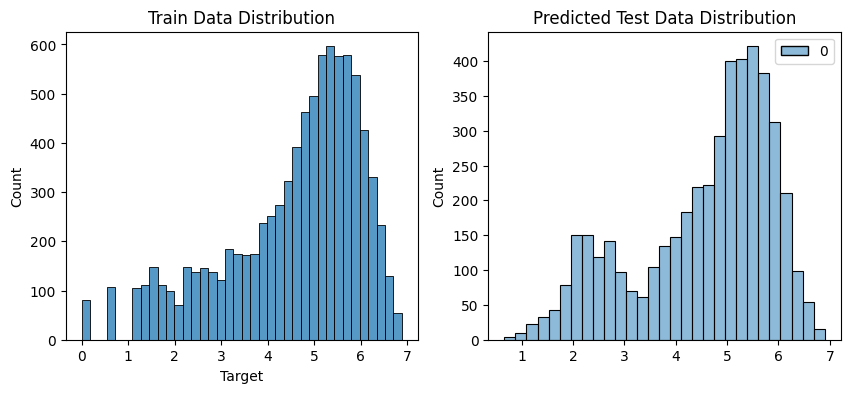

In [116]:
figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10,4)
sns.histplot(train['Target'], ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.log(Target_test), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [103]:
#Decision Tree 
from sklearn.tree import DecisionTreeRegressor
x= train.drop(["Target"],axis =1) # independent Valiables 
y = train[["Target"]] # output
train_X,val_X,train_y,val_y = train_test_split(x,y,test_size = 0.3 , random_state = 0)
model = DecisionTreeRegressor()
model.fit(train_X,train_y)

model.score(train_X,train_y)*100

99.73487987204619

In [104]:
model.score(val_X,val_y)*100

83.68485093745204